In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm
import scipy as sc

In [2]:
df = yf.download(["TSLA","BHP"],start="2010-01-01",end = "2020-01-01")
returns =np.log(1+df["Adj Close"]).pct_change()

[*********************100%%**********************]  2 of 2 completed


In [3]:
returns

,BHP,TSLA
Date,,
2010-01-04,NaN,NaN
2010-01-05,0.000033,NaN
2010-01-06,0.004303,NaN
2010-01-07,-0.002314,NaN
2010-01-08,0.003584,NaN
...,...,...
2019-12-24,-0.000287,0.004098
2019-12-26,0.001672,0.003800
2019-12-27,0.000570,-0.000370


In [4]:
weights = [0.5,0.5]

In [5]:
def portfolio_return(weights):
    return  np.dot(returns.mean(),weights)
  

In [6]:
def portfolio_std(weights):
    port_std = np.sqrt(np.dot(np.array(weights).transpose(),np.dot(returns.cov(),weights)))*np.sqrt(252)
    return port_std

0.13727385562726482

In [8]:
def weightscreator(returns):
    rand = np.random.random(len(returns.columns))
    rand =rand/rand.sum()
    return rand

In [9]:
weightscreator(returns)

array([0.39997457, 0.60002543])

In [10]:

R=[]
w=[]
stds=[]

for i in range (1000):
    weights= weightscreator(returns)
    R.append(portfolio_return(weights))
    stds.append(portfolio_std(weights))
    w.append(weights)

In [13]:
data = {'STD': stds,'Return': R,'Weights':w}
scatter = pd.DataFrame(data)
scatter

,STD,Return,Weights
0,0.122405,0.000277,"[0.5870215207569727, 0.41297847924302744]"
1,0.094647,0.000139,"[0.8091924625030616, 0.19080753749693835]"
2,0.186802,0.000488,"[0.24668225490122547, 0.7533177450987746]"
3,0.104088,0.000197,"[0.7152103683146681, 0.28478963168533195]"
4,0.233577,0.000624,"[0.027534898824400723, 0.9724651011755993]"
...,...,...,...
995,0.117191,0.000256,"[0.6201842015323507, 0.3798157984676493]"
996,0.127268,0.000295,"[0.5575214162434782, 0.4424785837565218]"
997,0.175445,0.000454,"[0.3019698671178338, 0.6980301328821662]"
998,0.160840,0.000408,"[0.37500010611029755, 0.6249998938897023]"


In [21]:
print(f'Optimal Standard Deviation - {scatter["STD"].min()}')
print(f'Optimal Return - {scatter.loc[scatter["STD"].idxmin(),"Return"]}')
print(f'Optimal weights - {scatter.loc[scatter["STD"].idxmin(),"Weights"]}')

Optimal Standard Deviation - 0.08937247183449998
Optimal Return - 5.86362457593811e-05
Optimal weights - [0.9390397 0.0609603]


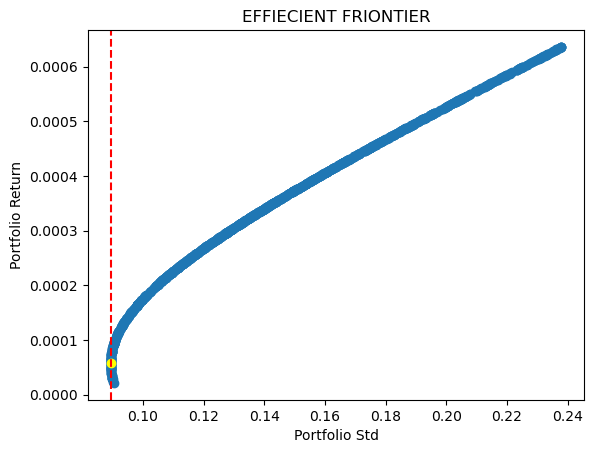

In [31]:
plt.scatter(stds, R)
plt.scatter(scatter["STD"].min(),scatter.loc[scatter["STD"].idxmin(),"Return"], color="yellow")
plt.axvline(x= scatter["STD"].min() , linestyle = '--', color = 'r')
plt.title("EFFIECIENT FRIONTIER")
plt.xlabel("Portfolio Std")
plt.ylabel("Portfolio Return")
plt.show()